# Importing Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re

# **Random Forest Classifier Baseline Model**

# SPAM MAIL DATASET CLEANING (Removed)

In [ ]:
# df_1 = pd.read_csv('/content/drive/MyDrive/mail_data.csv', encoding='latin-1')

# # df_1 = df_1[['ï»¿Category', 'Message']]
# df_1 = df_1[['Category', 'Message']]
# df_1.columns = ['label', 'text']

# # Convert labels to binary (1 for spam, 0 for non-spam)
# df_1['label'] = df_1['label'].map({'ham': 0, 'spam': 1})

# df_1.drop_duplicates(subset=['text'], inplace=True)

# # Create a 'cleaned_text' column and clean it step by step
# df_1['cleaned_text'] = df_1['text'].str.strip()

# # Remove multiple spaces
# df_1['cleaned_text'] = df_1['cleaned_text'].str.replace(r'\s+', ' ', regex=True)

# # Fix encoding issues (removes symbols like â, Âº, etc.)
# df_1['cleaned_text'] = df_1['cleaned_text'].str.encode('ascii', 'ignore').str.decode('utf-8')

# # extract statistical features that could help spam classification
# df_1['email_length'] = df_1['cleaned_text'].apply(len)  # Total characters
# df_1['word_count'] = df_1['cleaned_text'].apply(lambda x: len(x.split()))  # Word count
# df_1['uppercase_count'] = df_1['cleaned_text'].apply(lambda x: sum(1 for c in x if c.isupper()))  # Uppercase count
# df_1['punctuation_count'] = df_1['cleaned_text'].apply(lambda x: sum(1 for c in x if c in "!$%&*"))  # Punctuation count
# df_1['link_count'] = df_1['cleaned_text'].apply(lambda x: x.count("[URL]"))  # Link count

# df_1['subject line'] = "empty"
# df_1 = df_1.drop('text', axis=1)
# df_1 = df_1.rename(columns={'cleaned_text': 'text'})
# df_1

# TREC-2005 DATASET CLEANING

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/email_origin.csv', encoding='latin-1')
df = pd.read_csv('/content/drive/MyDrive/email_text.csv', encoding='latin-1')
df= df.sample(n=5572, random_state=42).reset_index(drop=True)
df.head()

,label,text
0,0,for rings escapenumber escapenumber escapenumb...
1,1,dear tracy it's the american airlines fare sal...
2,0,at escapenumber escapenumber est ice will be p...
3,0,isda press report december escapenumber escape...
4,0,hello here's a copy of the blue mountain greet...


In [ ]:
print(df['label'].value_counts())

label
0    3037
1    2535
Name: count, dtype: int64


In [ ]:

df = df.rename(columns={'origin': 'text'})
blank_rows = df[df['text'].isna() | (df['text'].str.strip() == '')]

# drop rows with blank 'text'
df = df[df['text'].notna() & df['text'].str.strip().astype(bool)]
df.reset_index(drop=True, inplace=True)

def clean_email(text):
    # Extract subject line
    subject_match = re.search(r'Subject:\s*(.*)', text)
    subject = subject_match.group(1).strip() if subject_match else ""

    # Remove headers and metadata
    body_start = text.find('\n\n')
    if body_start != -1:
        body = text[body_start:].strip()
    else:
        body = text

    body = re.sub(r'^.*?:', '', body, flags=re.MULTILINE)  # Strip header lines

    # Final clean-up
    body = re.sub(r'\n{2,}', '\n\n', body)  # Collapse multiple newlines
    body = body.strip()

    return pd.Series([subject, body])

df[['subject line', 'text']] = df['text'].apply(clean_email)

df['text'] = df['text'].str.replace('\n', ' ', regex=False)

# Extract statistical features that could help spam classification
df['email_length'] = df['text'].apply(len)  # Total characters
df['word_count'] = df['text'].apply(lambda x: len(x.split()))  # Word count
df['uppercase_count'] = df['text'].apply(lambda x: sum(1 for c in x if c.isupper()))  # Uppercase count
df['punctuation_count'] = df['text'].apply(lambda x: sum(1 for c in x if c in "!$%&*"))  # Punctuation count
df['link_count'] = df['text'].apply(lambda x: x.count("[URL]"))  # Link count

df['subject line'] = 'empty'
df.head()

print(df['label'].value_counts())

label
0    3037
1    2535
Name: count, dtype: int64


# ENRON DATASET CLEANING

In [ ]:
df_2_new = pd.read_csv('/content/drive/MyDrive/spam_ham_dataset.csv', encoding='latin-1')
print(df_2_new['label'].value_counts())

df_2_new.drop(columns=['Unnamed: 0'], inplace=True)

# Convert labels to binary (1 for spam, 0 for non-spam)
df_2_new['label'] = df_2_new['label'].map({'ham': 0, 'spam': 1})

df_2_new.drop(columns=['label_num'], inplace=True)

# drop rows with blank 'text'
df_2_new = df_2_new[df_2_new['text'].notna() & df_2_new['text'].str.strip().astype(bool)]
df_2_new.reset_index(drop=True, inplace=True)

blank_rows = df_2_new[df_2_new['text'].isna() | (df_2_new['text'].str.strip() == '')]

# drop rows with blank 'cleaned_text'
df_2_new = df_2_new[df_2_new['text'].notna() & df_2_new['text'].str.strip().astype(bool)]
df_2_new.reset_index(drop=True, inplace=True)

# Extract subject line and create a new column
df_2_new['subject line'] = df_2_new['text'].str.extract(r'^Subject:\s*(.*)', expand=False)

def remove_subject_line(text):
    return re.sub(r'^Subject:.*\n?', '', text, flags=re.IGNORECASE | re.MULTILINE)

df_2_new['text'] = df_2_new['text'].apply(remove_subject_line)

# Extract statistical features that could help spam classification
df_2_new['email_length'] = df_2_new['text'].apply(len)  # Total characters
df_2_new['word_count'] = df_2_new['text'].apply(lambda x: len(x.split()))  # Word count
df_2_new['uppercase_count'] = df_2_new['text'].apply(lambda x: sum(1 for c in x if c.isupper()))  # Uppercase count
df_2_new['punctuation_count'] = df_2_new['text'].apply(lambda x: sum(1 for c in x if c in "!$%&*"))  # Punctuation count
df_2_new['link_count'] = df_2_new['text'].apply(lambda x: x.count("[URL]"))  # Link count

df_2_new.head()

print(df_2_new['label'].value_counts())

label
ham     3672
spam    1499
Name: count, dtype: int64
label
0    3672
1    1499
Name: count, dtype: int64


# COMBINING DATASETS

In [ ]:
combined_df = pd.concat([df, df_2_new], ignore_index=True)

for col in ['text', 'subject line']:
    # Remove weird characters
    combined_df[col] = combined_df[col].astype(str)  # Ensure all text
    combined_df[col] = combined_df[col].str.encode('ascii', 'ignore').str.decode('utf-8')

    # Replace placeholder tokens
    combined_df[col] = combined_df[col].replace({
        r'&lt;#&gt;': '[NUMBER]',
        r'&lt;URL&gt;': '[URL]',
        r'&lt;DECIMAL&gt;': '[DECIMAL]',
        r'&lt;TIME&gt;': '[TIME]',
        r'&lt;EMAIL&gt;': '[EMAIL]',
        r'&gt;': ''
    }, regex=True)

combined_df.head()

,label,text,subject line,email_length,word_count,uppercase_count,punctuation_count,link_count
0,0,for rings escapenumber escapenumber escapenumb...,empty,691,110,0,0,0
1,1,dear tracy it's the american airlines fare sal...,empty,14988,2393,8,0,0
2,0,at escapenumber escapenumber est ice will be p...,empty,203,26,0,0,0
3,0,isda press report december escapenumber escape...,empty,9487,1529,0,0,0
4,0,hello here's a copy of the blue mountain greet...,empty,432,67,0,0,0


In [ ]:
print(combined_df['label'].value_counts())

label
0    6709
1    4034
Name: count, dtype: int64


# Random Forest on Combined Dataset

In [ ]:
import numpy as np
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from scipy.sparse import hstack
import pandas as pd
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import scipy.sparse as sp

# Define the statistical feature columns that already exist in the dataset
stat_feature_cols = ['email_length', 'word_count', 'uppercase_count', 'punctuation_count', 'link_count']

# Extract the existing statistical features from the dataframe
X_stats = combined_df[stat_feature_cols].values

# Apply TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=500, stop_words="english")
X_tfidf = vectorizer.fit_transform(combined_df['text'])

subject_vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
X_subject_tfidf = subject_vectorizer.fit_transform(combined_df['subject line'])

# --- Combine all features: [body_tfidf | subject_tfidf | stats] ---
X_combined = sp.hstack((X_tfidf, X_subject_tfidf, X_stats))

In [ ]:
print(combined_df['label'].value_counts())

label
0    6709
1    4034
Name: count, dtype: int64


In [ ]:
combined_df

,label,text,subject line,email_length,word_count,uppercase_count,punctuation_count,link_count
0,0,for rings escapenumber escapenumber escapenumb...,empty,691,110,0,0,0
1,1,dear tracy it's the american airlines fare sal...,empty,14988,2393,8,0,0
2,0,at escapenumber escapenumber est ice will be p...,empty,203,26,0,0,0
3,0,isda press report december escapenumber escape...,empty,9487,1529,0,0,0
4,0,hello here's a copy of the blue mountain greet...,empty,432,67,0,0,0
...,...,...,...,...,...,...,...,...
10738,0,the transport volumes decreased from 25000 to ...,put the 10 on the ft\r,503,148,0,0,0
10739,0,hpl can ' t take the extra 15 mmcf / d over th...,3 / 4 / 2000 and following noms\r,1072,296,0,2,0
10740,0,">\r\n>\r\njulie , as i mention earlier we hope...",calpine daily gas nomination\r,363,73,0,0,0
10741,0,attached are the worksheets for august 2000 ac...,industrial worksheets for august 2000 activity\r,516,104,0,1,0


In [ ]:
# --- Train/Val/Test Split ---
y = combined_df['label'].values
train_idx, temp_idx = train_test_split(np.arange(X_combined.shape[0]), test_size=0.4, stratify=combined_df['label'], random_state=42)
val_idx, test_idx = train_test_split(temp_idx, test_size=0.5, stratify=y[temp_idx], random_state=42)

# Convert X_combined to CSR format before indexing
X_combined_csr = X_combined.tocsr()

X_train = X_combined_csr[train_idx]
y_train = combined_df['label'].iloc[train_idx]  # Use .iloc to access labels based on index
X_val = X_combined_csr[val_idx]
y_val = combined_df['label'].iloc[val_idx]
X_test = X_combined_csr[test_idx]
y_test = combined_df['label'].iloc[test_idx]


In [ ]:
print("Number of training samples:", len(y_train))
print("Number of validation samples:", len(y_val))
print("Number of test samples:", len(y_test))

Number of training samples: 6445
Number of validation samples: 2149
Number of test samples: 2149


In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(4025), np.int64(1): np.int64(2420)}


In [ ]:
# # Balance Datasets
spam_rows = y_train == 1
X_train_balanced = sp.vstack([X_train] + [X_train[spam_rows]])
y_train_balanced = np.concatenate([y_train] + [y_train[spam_rows]])

In [ ]:
unique, counts = np.unique(y_train_balanced, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(4025), np.int64(1): np.int64(4840)}


In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Predict and Evaluate
y_pred = rf_model.predict(X_test)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on test set: 0.947417403443462
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      1342
           1       0.92      0.94      0.93       807

    accuracy                           0.95      2149
   macro avg       0.94      0.95      0.94      2149
weighted avg       0.95      0.95      0.95      2149



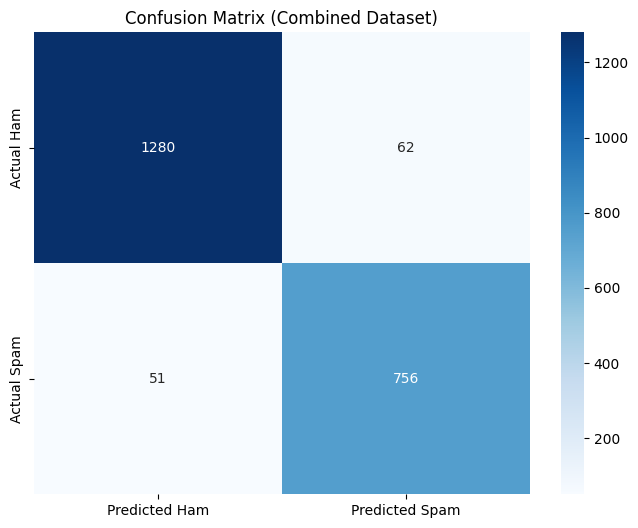

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Confusion Matrix for combined dataset
cm_combined = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Ham', 'Predicted Spam'],
            yticklabels=['Actual Ham', 'Actual Spam'])
plt.title("Confusion Matrix (Combined Dataset)")
plt.show()

# LING-SPAM DATASET CLEANING

In [ ]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("mandygu/lingspam-dataset")

print("Path to dataset files:", path)


# Define dataset path
dataset_folder = path  # This is the downloaded dataset folder

# List files in the dataset folder
files = os.listdir(dataset_folder)
print("Dataset files:", files)

# Load a CSV file into pandas
csv_file = os.path.join(dataset_folder, files[0]) # Replace with actual file name
df = pd.read_csv(csv_file, encoding='ISO-8859-1')


# utilizing 2 differnet datasets
df_test = df.copy()
# cleaning df_1
# Rename relevant columns
print(df_test['label'].value_counts())

df_test = df_test[['label', 'message', 'subject']]
df_test.columns = ['label', 'text', 'subject line']


# Extract statistical features that could help spam classification
df_test['email_length'] = df_test['text'].apply(len)  # Total characters
df_test['word_count'] = df_test['text'].apply(lambda x: len(x.split()))  # Word count
df_test['uppercase_count'] = df_test['text'].apply(lambda x: sum(1 for c in x if c.isupper()))  # Uppercase count
df_test['punctuation_count'] = df_test['text'].apply(lambda x: sum(1 for c in x if c in "!$%&*"))  # Punctuation count
df_test['link_count'] = df_test['text'].apply(lambda x: x.count("[URL]"))  # Link count

# Display first few rows
df_test

for i in ['text', 'subject line']:
    # Remove multiple spaces
    df_test[i] = df_test[i].str.strip()
    df_test[i] = df_test[i].str.replace(r'\s+', ' ', regex=True)

    # Fix encoding issues since there are random symbols such as: â, Âº, etc.
    df_test[i] = df_test[i].str.encode('ascii', 'ignore').str.decode('utf-8')

    # Removing number placeholders (&lt;#&gt)
    df_test[i] = df_test[i].str.replace(r'&lt;#&gt;', '[NUMBER]', regex=True)

    # Removing URL placeholders (&lt;URL&gt;)
    df_test[i] = df_test[i].str.replace(r'&lt;URL&gt;', '[URL]', regex=True)

    # Removing decimal placeholders (&lt;DECIMAL&gt;)
    df_test[i] = df_test[i].str.replace(r'&lt;DECIMAL&gt;', '[DECIMAL]', regex=True)

    # Removing time placeholders (&lt;TIME&gt;)
    df_test[i] = df_test[i].str.replace(r'&lt;TIME&gt;', '[TIME]', regex=True)

    # Removing email placeholders (&lt;EMAIL&gt;)
    df_test[i] = df_test[i].str.replace(r'&lt;EMAIL&gt;', '[EMAIL]', regex=True)

    # Remove all occurrences of '&gt;' (greater-than sign encoding)
    df_test[i] = df_test[i].str.replace(r'&gt;', '', regex=True)

Path to dataset files: /root/.cache/kagglehub/datasets/mandygu/lingspam-dataset/versions/1
Dataset files: ['messages.csv']
label
0    2412
1     481
Name: count, dtype: int64


In [ ]:
print(df_test['label'].value_counts())

label
0    2412
1     481
Name: count, dtype: int64


In [ ]:
# BALANCE THE NUMBER OF EMPTY SUBJECT LINES WITH FILLED SUBJECT LINES

# Get random indices for half the rows
np.random.seed(42)
random_indices = np.random.choice(df_test.index, size=len(df_test) // 2, replace=False)

# Replace those subject lines with "empty"
df_test['subject line'] = df_test['subject line'].fillna('empty') # fill NaNs with "empty"
df_test['subject line'] = df_test['subject line'].replace('', 'empty') # replace empty strings with "empty"

# drop rows with blank 'text'
df_test = df_test[df_test['text'].notna() & df_test['text'].str.strip().astype(bool)]
df_test.reset_index(drop=True, inplace=True)

# TEST ON UNSEEN DATASET

Accuracy on new test set: 0.6394745938472174
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.62      0.74      2412
           1       0.28      0.73      0.40       481

    accuracy                           0.64      2893
   macro avg       0.60      0.68      0.57      2893
weighted avg       0.81      0.64      0.69      2893



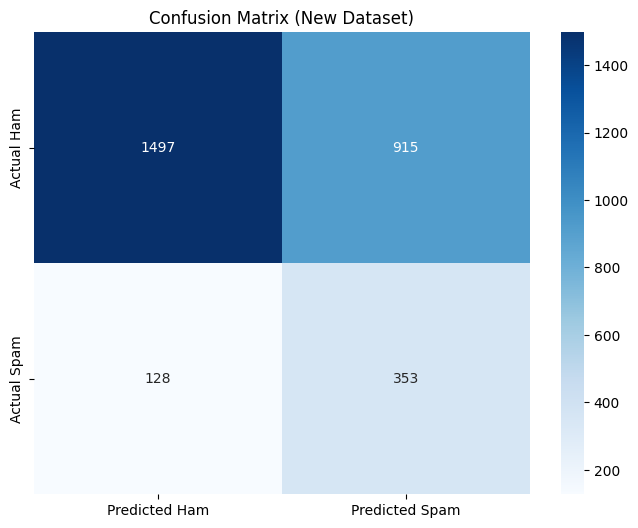

In [ ]:
# Match features
df_test['subject line'] = df_test['subject line'].replace('', 'empty')
df_test_stats = df_test[stat_feature_cols].values
df_test_tfidf = vectorizer.transform(df_test['text'])  # Use the SAME vectorizer used during training
df_test_subject_tfidf = subject_vectorizer.transform(df_test['subject line'])  # Use SAME subject vectorizer
df_test_combined = sp.hstack((df_test_tfidf, df_test_subject_tfidf, df_test_stats))

# Predict and Evaluate
y_test_true = df_test['label']
y_test_pred = rf_model.predict(df_test_combined)

print("Accuracy on new test set:", accuracy_score(y_test_true, y_test_pred))
print("Classification Report:\n", classification_report(y_test_true, y_test_pred))

# Confusion Matrix for unseen dataset
cm = confusion_matrix(y_test_true, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Ham', 'Predicted Spam'],
            yticklabels=['Actual Ham', 'Actual Spam'])
plt.title("Confusion Matrix (New Dataset)")
plt.show()

In [ ]:
# import numpy as np
# from sklearn.pipeline import FeatureUnion
# from sklearn.preprocessing import FunctionTransformer
# from scipy.sparse import hstack
# import pandas as pd
# import re
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report
# import scipy.sparse as sp

# # Define the statistical feature columns that already exist in the dataset
# stat_feature_cols = ['email_length', 'word_count', 'uppercase_count', 'punctuation_count', 'link_count']

# # Extract the existing statistical features from the dataframe
# X_stats = df_2[stat_feature_cols].values

# # Apply TF-IDF Vectorization
# vectorizer = TfidfVectorizer(max_features=100, stop_words="english")
# X_tfidf = vectorizer.fit_transform(df_2['text'])

# # Combine TF-IDF features with existing statistical features
# X_combined = sp.hstack((X_tfidf, X_stats))

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X_combined, df_2['label'], test_size=0.2, random_state=42)

# # Train the Random Forest model
# rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
# rf_model.fit(X_train, y_train)

# # Predictions and Evaluation
# y_pred = rf_model.predict(X_test)

# # Evaluate model on original test set
# print("Accuracy on original dataset:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

# # Transform df_1 using the same TF-IDF vectorizer
# X_new = vectorizer.transform(df_1['cleaned_text'])

# # Extract additional statistical features
# X_stats_new = df_1[stat_feature_cols].values

# # Combine TF-IDF features with statistical features
# assert X_new.shape[0] == X_stats_new.shape[0], "Mismatch between TF-IDF and statistical feature sizes"
# X_combined_new = sp.hstack((X_new, X_stats_new))

# # Predict using the trained model on new dataset
# y_new_pred = rf_model.predict(X_combined_new)

# # Evaluate performance on the new dataset
# accuracy_new = accuracy_score(df_1['label'], y_new_pred)
# report_new = classification_report(df_1['label'], y_new_pred)

# # Display accuracy and classification report
# print("Accuracy on new dataset:", accuracy_new)
# print("Classification Report on new dataset:\n", report_new)